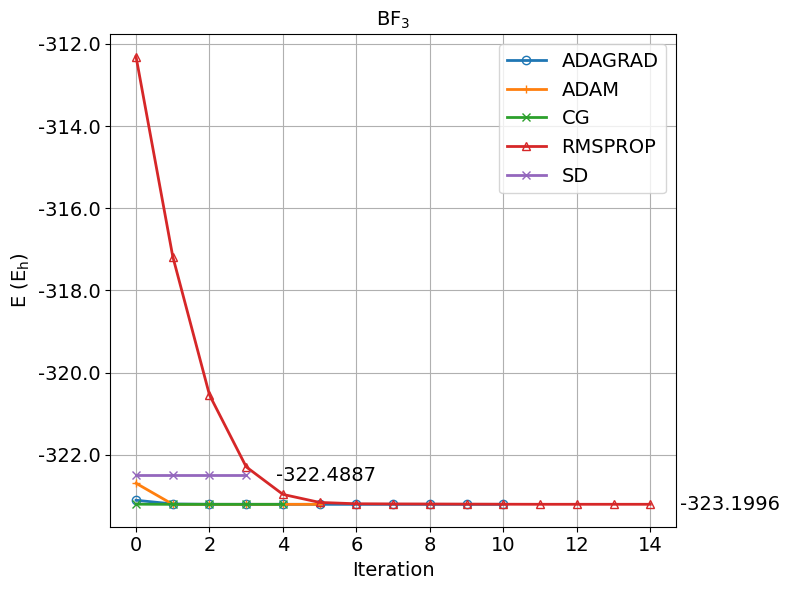

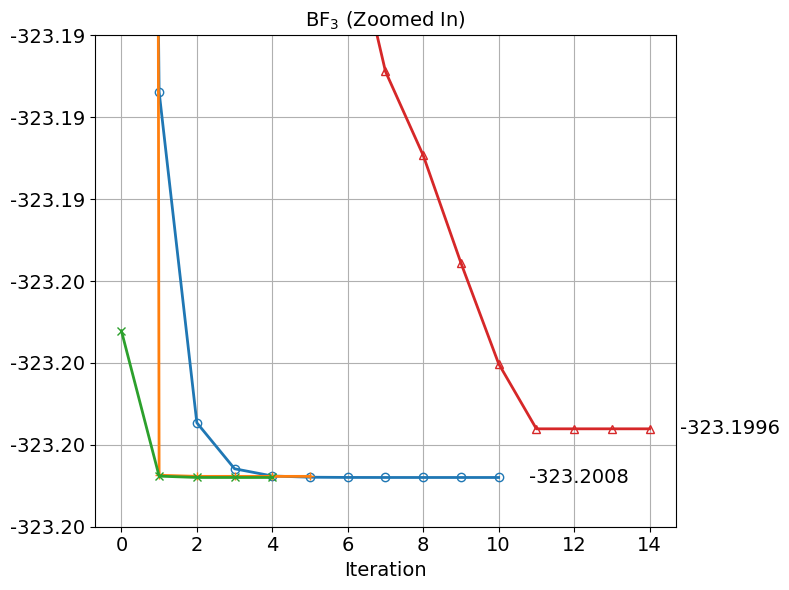

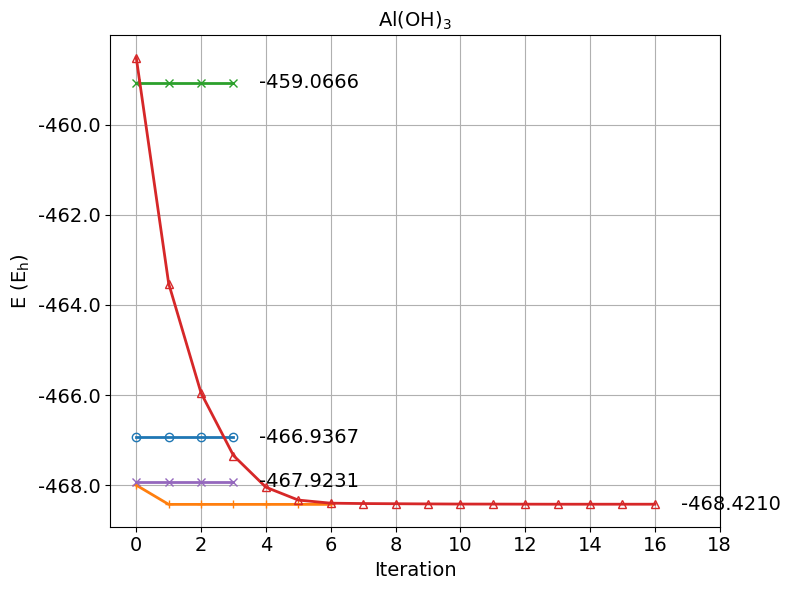

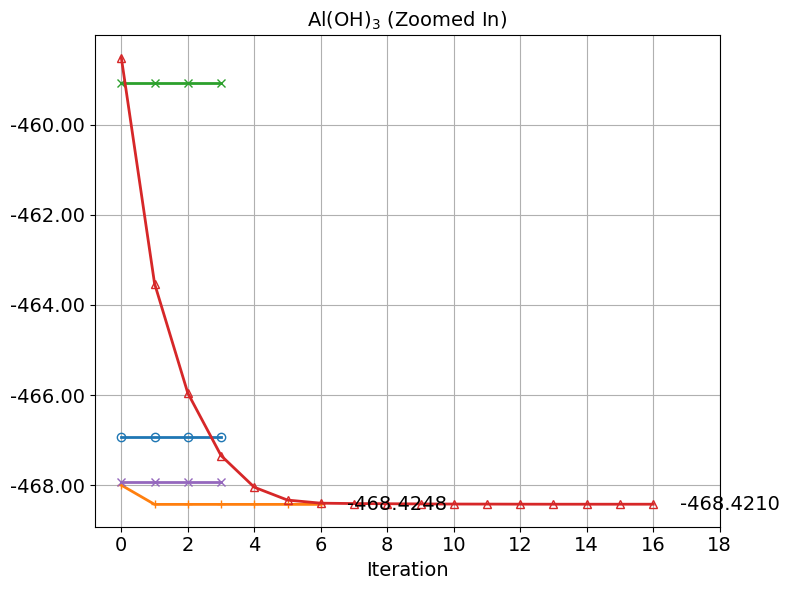

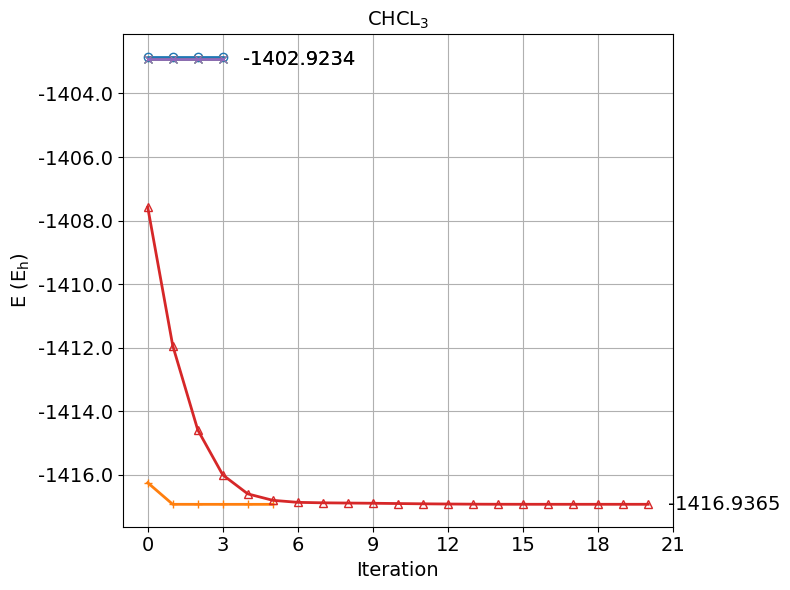

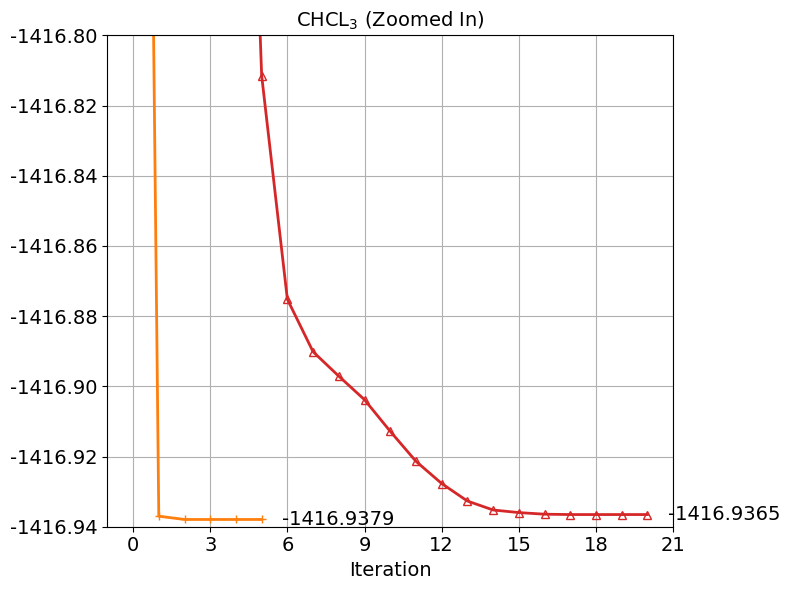

In [1]:
## This notebook produces the plots for BF3, CHCl3 and Al(OH)3 to analyze convergence
## (Energy vs. iteration number).
## Plot 1: full optimization trajectory.
## Plot 2: zoomed view near the energy minimum for detailed inspection.

import csv
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import re
from matplotlib.ticker import MaxNLocator


def format_molecule(name: str) -> str:
    # Sustitutes numbers by subindixes in LaTeX for molecule naming
    # ie H2O to H_2O
    return re.sub(r'(\d+)', r'$_{\1}$', name.upper())


molecule_list = ["BF3" , "ALOH", "CHCL3"]
for molecule in molecule_list:
    #Convert molecule name to latex format
    title_str = format_molecule(molecule)

    # Read the data
    data = defaultdict(list)  # alpha: list of (iteration, energy)

    with open(f"{molecule}.csv", mode='r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            alg = row['alg']
            iteration = int(row['iteration'])
            energy = float(row['energy'])
            data[alg].append((iteration, energy))

    # Plot

    markers = ['o', '+', 'x', '^', 'x', 'o', '+']
    final_energies = []
    plt.figure(figsize=(8, 6))
    plt.tick_params(axis='both', labelsize=14)


    if molecule == "BF3":
        alg_to_show = ("SD", "RMSPROP")
    elif molecule == "CHCl3" or molecule == "CHCL3":
        alg_to_show = ( 'CG', 'SD','RMSPROP')
    elif molecule == "AlOH" or molecule == "ALOH":
        alg_to_show = ( 'CG', 'ADAGRAD', 'SD','RMSPROP')


    for i, (alg, points) in enumerate(sorted(data.items())):
        iterations, energies = zip(*points)
        marker = markers[i % len(markers)]
        plt.plot(iterations, energies, marker=marker, markerfacecolor='none',linewidth=2,label=f'{alg}')

    # Only show label for selected alphas
        if alg in alg_to_show:
            last_x = iterations[-1]
            last_y = energies[-1]
            plt.text(last_x + 0.8, last_y, f'{last_y:.4f}', fontsize=14, verticalalignment='center')


    plt.xlabel('Iteration', fontsize=14)
    plt.ylabel(r'E (E$_{\mathrm{h}}$)', fontsize=14)  # recta
    #plt.title('$\\mathrm{BF_3}$', fontsize=14)
    #plt.title(f'{molecule}', fontsize=14)
    if title_str == "ALOH":
        plt.title('$\\mathrm{Al(OH)_3}$', fontsize=14)
        plt.gca().set_xticks(np.arange(0,20, 2))  # paso=1
    else:
        plt.title(title_str, fontsize=14)
        
    if molecule == "BF3":
        plt.legend(fontsize=14)

    plt.grid(True)

    # Optional: format Y-axis with 6 decimals
    from matplotlib.ticker import FuncFormatter
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.1f}"))
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))


    plt.tight_layout()
    plt.savefig(f"{molecule}_{"HF"}.png", dpi=300)
    #plt.legend(fontsize=14)
    plt.show()

    # === Plot 3: Zoomed Y-axis ===
    plt.figure(figsize=(8, 6))
    plt.tick_params(axis='both', labelsize=14)

    if molecule == "BF3":
        # Zoom on y axis for CO
        plt.ylim(-323.202, -323.19) #  Range: 125 kcal approx, alpha = 0.02 and 0.002 
        alg_to_show = ( "RMSPROP", "ADAGRAD")
    elif molecule == "CHCl3"  or molecule == "CHCL3":
        alg_to_show = ('ADAM','RMSPROP')
        plt.ylim(-1416.94, -1416.8)
    elif molecule == "ALOH" or molecule == "AlOH":
        #plt.ylim(-468.43, -468.38)
        alg_to_show = ('ADAM','RMSPROP')


    for i, (alg, points) in enumerate(sorted(data.items())):
        iterations, energies = zip(*points)
        marker = markers[i % len(markers)]
        plt.plot(iterations, energies, marker=marker, markerfacecolor='none', linewidth=2,label=f'{alg}')

    # Only show label for selected alphas
        if alg in alg_to_show:
            last_x = iterations[-1]
            last_y = energies[-1]
            plt.text(last_x + 0.8, last_y, f'{last_y:.4f}', fontsize=14, verticalalignment='center')


    plt.xlabel('Iteration', fontsize=14)
    if title_str == "ALOH":
        plt.title('$\\mathrm{Al(OH)_3}$ (Zoomed In)', fontsize=14)
        plt.gca().set_xticks(np.arange(0,20, 2))  # paso=1
    else:
        plt.title(title_str+" (Zoomed In)", fontsize=14)
        
    plt.grid(True)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.2f}"))
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.tight_layout()
    plt.savefig(f"{molecule}_HF_zoom.png", dpi=300)
    #plt.legend()
    plt.show()